<a href="https://colab.research.google.com/github/myasmin/Capstone-3-TripAdvisor_Review_NLP-/blob/main/Data_Preprocessing_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clear memory :

In [1]:
%reset -f

# Data Wrangling:

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


###Import All Libraries:

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from pprint import pprint

###Import Dataset:

The Dataset (Kaggle link is [here to download](https://www.kaggle.com/datasets/inigolopezrioboo/a-tripadvisor-dataset-for-nlp-tasks)) consist Restaurant Reviews of Six Cities in the World (Barcelona, London, Paris, Madrid, New York and New Delhi).

We will consider the dataset from Barcelona for our analysis.



In [4]:
barcelona = pd.read_csv('gdrive/My Drive/Colab Notebooks/TripAdvisor Review NLP Analysis/data/Barcelona_reviews.csv')
barcelona.head()

,Unnamed: 0,parse_count,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,url_restaurant,author_id
0,0,1,Chalito_Rambla,1,Negative,review_774086112,Terrible food Terrible service,"Ok, this place is terrible! Came here bc we’ve...","Ok, this place is terrible! Came here bc we’ve...","October 12, 2020",Barcelona_Catalonia,https://www.tripadvisor.com/Restaurant_Review-...,UID_0
1,1,2,Chalito_Rambla,5,Positive,review_739142140,The best milanesa in central Barcelona,This place was a great surprise. The food is d...,This place was a great surprise. The food is d...,"January 14, 2020",Barcelona_Catalonia,https://www.tripadvisor.com/Restaurant_Review-...,UID_1
2,2,3,Chalito_Rambla,5,Positive,review_749758638,Family bonding,The food is excellent.....the ambiance is very...,The food is excellent.....the ambiance is very...,"March 7, 2020",Barcelona_Catalonia,https://www.tripadvisor.com/Restaurant_Review-...,UID_2
3,3,4,Chalito_Rambla,5,Positive,review_749732001,Best food,"The food is execellent ,affortable price for p...","The food is execellent ,affortable price for p...","March 7, 2020",Barcelona_Catalonia,https://www.tripadvisor.com/Restaurant_Review-...,UID_3
4,4,5,Chalito_Rambla,5,Positive,review_749691057,Amazing Food and Fantastic Service,"Mr Suarez,The food at your restaurant was abso...","Mr Suarez,The food at your restaurant was abso...","March 7, 2020",Barcelona_Catalonia,https://www.tripadvisor.com/Restaurant_Review-...,UID_4


###Modify Data for Text Analysis (Data Preprocessing):

In [5]:
## Delete Unnecessary Columns:
barcelona.drop(columns=["Unnamed: 0","parse_count","review_id","url_restaurant","author_id","date","title_review","review_preview","city"],inplace=True)

In [6]:
## Delete all Null rows:
barcelona= barcelona.dropna(how='any',axis=0)

In [7]:
## Change Variable(Column Type):
barcelona['rating_review'] = barcelona['rating_review'].astype('float')
barcelona['rating_review'] = barcelona['rating_review'].astype('int64')

In [8]:
barcelona.head()

,restaurant_name,rating_review,sample,review_full
0,Chalito_Rambla,1,Negative,"Ok, this place is terrible! Came here bc we’ve..."
1,Chalito_Rambla,5,Positive,This place was a great surprise. The food is d...
2,Chalito_Rambla,5,Positive,The food is excellent.....the ambiance is very...
3,Chalito_Rambla,5,Positive,"The food is execellent ,affortable price for p..."
4,Chalito_Rambla,5,Positive,"Mr Suarez,The food at your restaurant was abso..."


In [9]:
barcelona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416354 entries, 0 to 416355
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   restaurant_name  416354 non-null  object
 1   rating_review    416354 non-null  int64 
 2   sample           416354 non-null  object
 3   review_full      416354 non-null  object
dtypes: int64(1), object(3)
memory usage: 15.9+ MB


For basic preprocessing purpose, we will use the NLTK library to preprocess our text data:

In [10]:
import nltk

nltk.download(['stopwords','averaged_perceptron_tagger','wordnet'])

from collections import defaultdict
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


###Set Stopwords:

In [11]:
stop = set(stopwords.words('english'))

POS Tagging:

In [12]:
def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

###Preprocessing:

In [13]:
def preprocess(doc, stop_words= stop):
    regex_token = RegexpTokenizer(r'\w+')
    doc = regex_token.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in stop]
    doc = pos_tag(doc)
    doc = [(word[0], get_wordnet_pos(word[1])) for word in doc]
    lemmatizer = WordNetLemmatizer()
    doc = [lemmatizer.lemmatize(word[0], word[1]) for word in doc]
    return ' '.join(doc)

In [14]:
barcelona['text'] = barcelona['review_full'].map(lambda s: preprocess(s))

###Tokenizing:

In [18]:
barcelona['tokenized'] = [x.split() for x in barcelona['text']]

In [19]:
barcelona.head()

,restaurant_name,rating_review,sample,review_full,text,tokenized
0,Chalito_Rambla,1,Negative,"Ok, this place is terrible! Came here bc we’ve...",ok place terrible come bc always walk around s...,"[ok, place, terrible, come, bc, always, walk, ..."
1,Chalito_Rambla,5,Positive,This place was a great surprise. The food is d...,place great surprise food delicious dessert we...,"[place, great, surprise, food, delicious, dess..."
2,Chalito_Rambla,5,Positive,The food is excellent.....the ambiance is very...,food excellent ambiance nice price affordable ...,"[food, excellent, ambiance, nice, price, affor..."
3,Chalito_Rambla,5,Positive,"The food is execellent ,affortable price for p...",food execellent affortable price people friend...,"[food, execellent, affortable, price, people, ..."
4,Chalito_Rambla,5,Positive,"Mr Suarez,The food at your restaurant was abso...",mr suarez food restaurant absolutely amazing h...,"[mr, suarez, food, restaurant, absolutely, ama..."


In [20]:
barcelona['Word_count']= barcelona['review_full'].map(lambda x: len(x.split()))

In [21]:
barcelona.head()

,restaurant_name,rating_review,sample,review_full,text,tokenized,Word_count
0,Chalito_Rambla,1,Negative,"Ok, this place is terrible! Came here bc we’ve...",ok place terrible come bc always walk around s...,"[ok, place, terrible, come, bc, always, walk, ...",163
1,Chalito_Rambla,5,Positive,This place was a great surprise. The food is d...,place great surprise food delicious dessert we...,"[place, great, surprise, food, delicious, dess...",44
2,Chalito_Rambla,5,Positive,The food is excellent.....the ambiance is very...,food excellent ambiance nice price affordable ...,"[food, excellent, ambiance, nice, price, affor...",25
3,Chalito_Rambla,5,Positive,"The food is execellent ,affortable price for p...",food execellent affortable price people friend...,"[food, execellent, affortable, price, people, ...",50
4,Chalito_Rambla,5,Positive,"Mr Suarez,The food at your restaurant was abso...",mr suarez food restaurant absolutely amazing h...,"[mr, suarez, food, restaurant, absolutely, ama...",35


Save the Preprocessed Tokenized Dataset for further use:

In [ ]:
# barcelona.to_csv('gdrive/My Drive/Colab Notebooks/TripAdvisor Review NLP Analysis/data/barcelona.csv', index=False)

# Exploratory Data Analysis on Dataset:

###Analysis on 'Sample'( review Positive or Negative) Variable:


Text(0, 0.5, 'Total Count on Reviews')

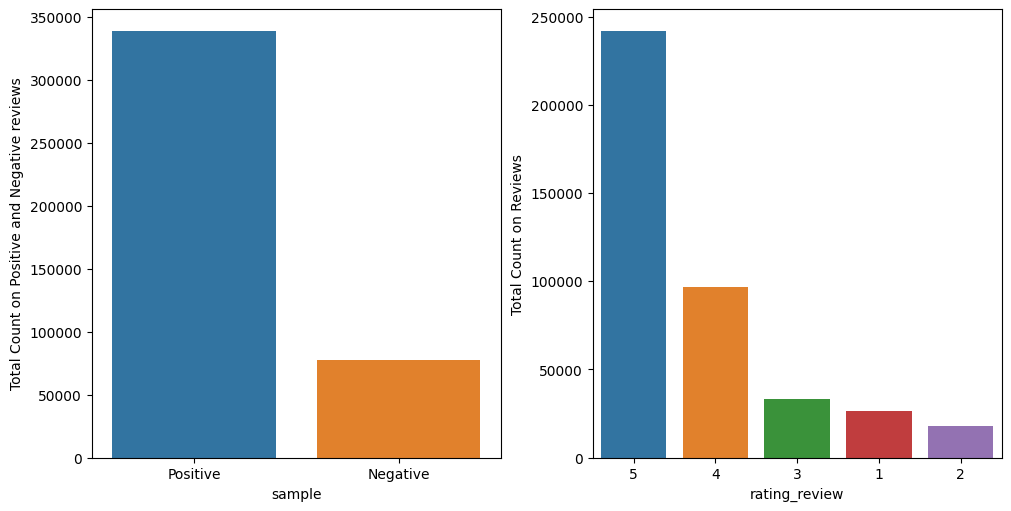

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5),layout="constrained")

#Create a Barplot:
sns.countplot( x= 'sample', data= barcelona, order=barcelona['sample'].value_counts().index, ax=ax1)
ax1.set_ylabel("Total Count on Positive and Negative reviews")

sns.countplot( x= 'rating_review', data= barcelona, order=barcelona['rating_review'].value_counts().index, ax=ax2)
ax2.set_ylabel("Total Count on Reviews")

Comment:

From the graphs, we see that the Positive Reviews are majority, i.e. people left positive reviews most about the restaurants.

For further analysis, we have to keep in mind that this is a Imbalanced Class Classification for Sentiment Analysis.

### Analysis on 'Restaurant Name' Variable:

In [23]:
barcelona['restaurant_name'].nunique()

6621

Comment: There are 6621 different restaurant names in Barcelona covered in this dataset.

### Analysis on Restaurant Reviews:

Frequency Distrubution of Top Tokenized Words:

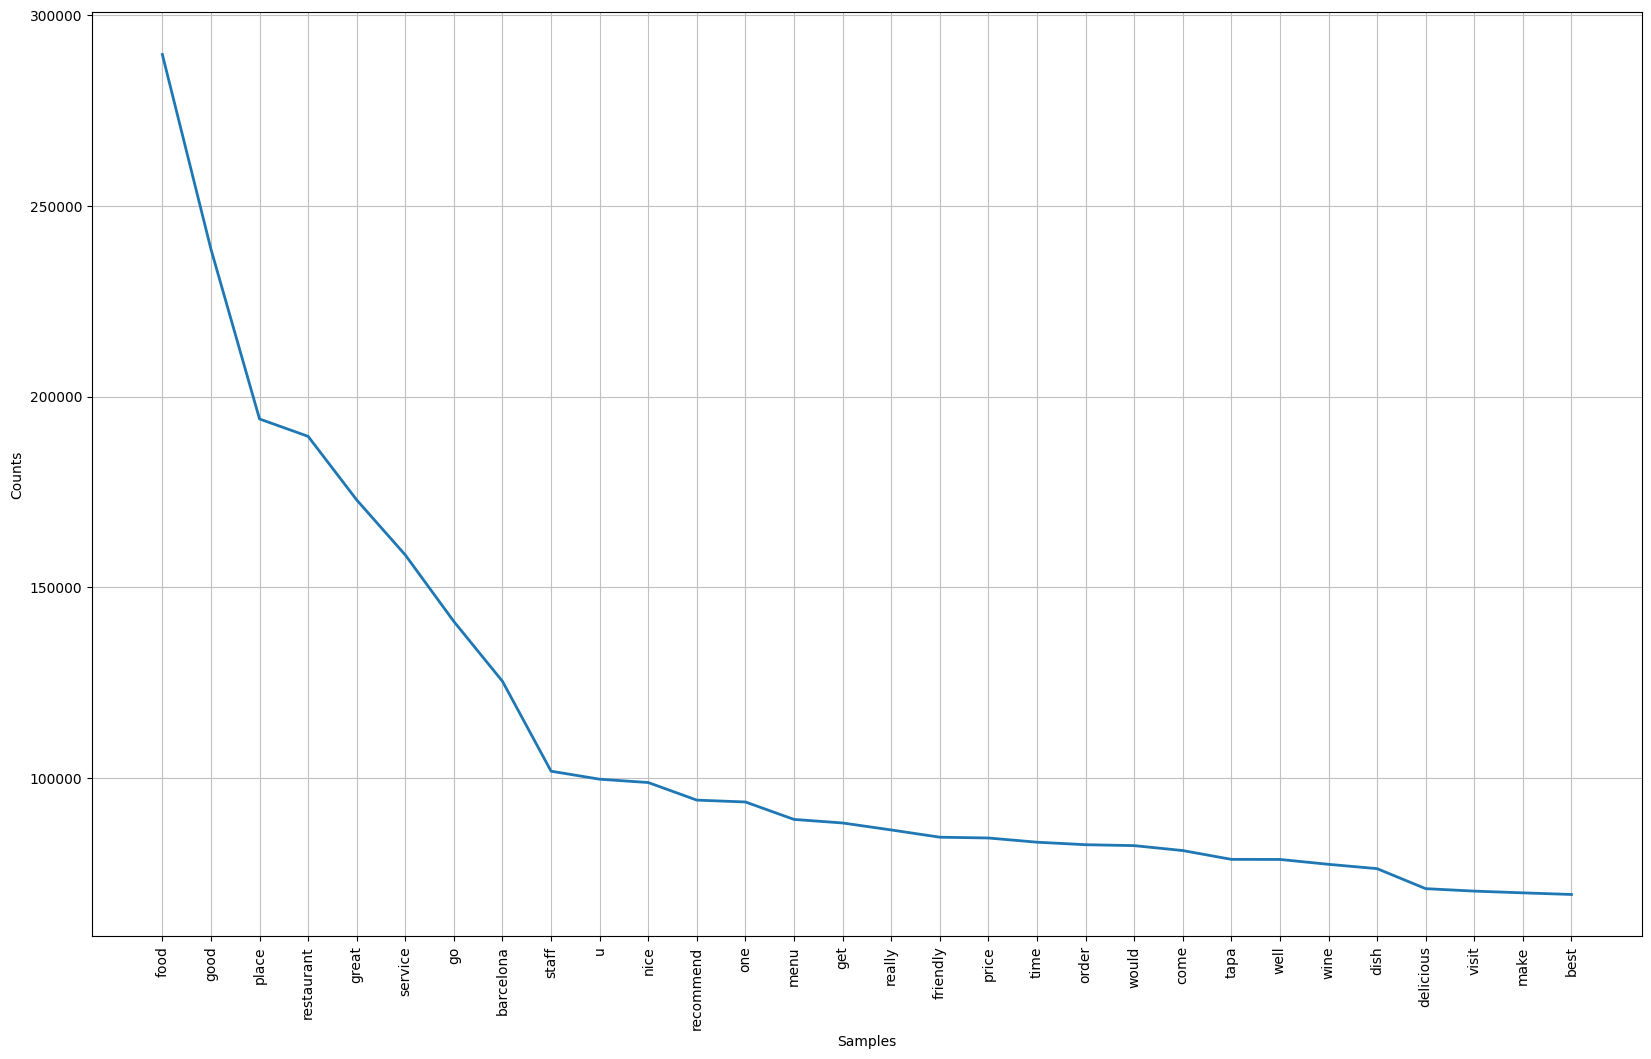

<Axes: xlabel='Samples', ylabel='Counts'>

In [24]:
from nltk.probability import FreqDist

tokenized_words = barcelona['tokenized'].to_list()

word_list = []
for x in tokenized_words:
    word_list.extend(x)
word_list

freq_dist_text = FreqDist(word_list)
plt.subplots(figsize=(20,12))
freq_dist_text.plot(30)

Top 20 most Common words:

In [25]:
from nltk.probability import FreqDist

freq_dist_text.most_common(20)

[('food', 289763),
 ('good', 238723),
 ('place', 194183),
 ('restaurant', 189630),
 ('great', 172956),
 ('service', 158522),
 ('go', 141073),
 ('barcelona', 125397),
 ('staff', 101827),
 ('u', 99726),
 ('nice', 98855),
 ('recommend', 94242),
 ('one', 93757),
 ('menu', 89182),
 ('get', 88252),
 ('really', 86422),
 ('friendly', 84520),
 ('price', 84313),
 ('time', 83208),
 ('order', 82553)]

The above list are the most frequent words in the text.

Wordclouds w.r.to Positive and Negative reviews:

In [26]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40,
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

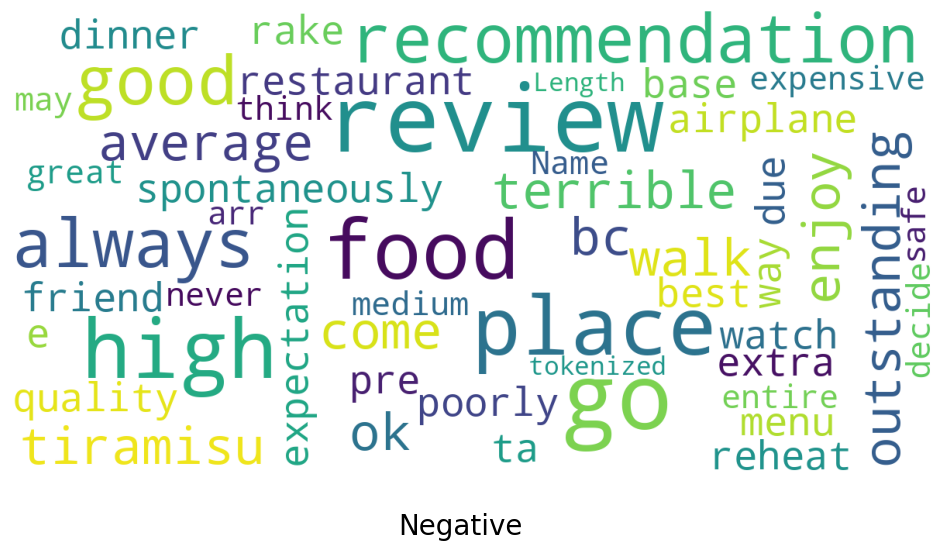

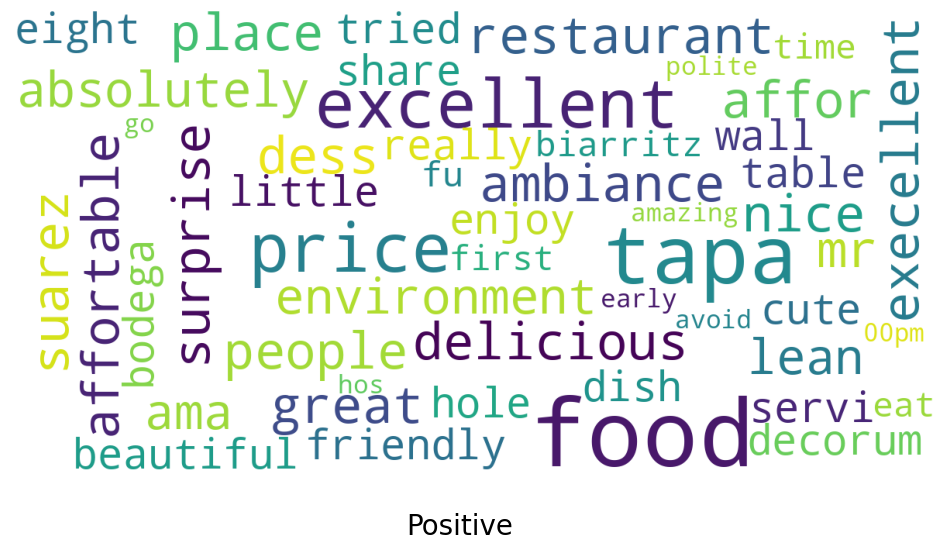

In [ ]:
for rating in list(barcelona['sample'].unique()):
    show_wordcloud(barcelona[barcelona['sample']==rating]['tokenized'], title=rating)

Wordcount by reviews:

<Axes: xlabel='rating_review', ylabel='Word_count'>

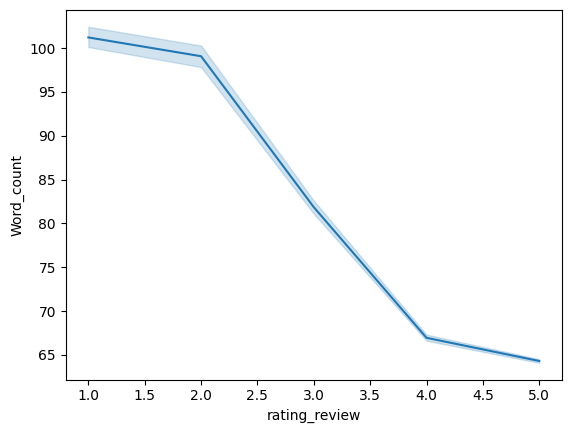

In [27]:
sns.lineplot(x='rating_review', data=barcelona, y='Word_count')

Observation:

Reviewers with 5 star ratings tend to use less words in their reveiws/ comments, where as people with 1 and 2 star rating tend to use more words to post their reviews.


So, in general we can infer that most people are happy with the service and they post positive reviews. People who are not happy with the services, they post long reviews; but they are less in numbers compared to the number of happy customers.



---



---

